In [72]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.fft import fft
from scipy.signal import stft

# 1. Short Time Fourier Transform on Real Data

In [4]:
# Load the data
data = np.load('einthoven_I.npz')
ecg = data['ecg']
t = data['t']
samp_freq = data['samp_freq']

Average heart rate during the subset: 85.14 bpm


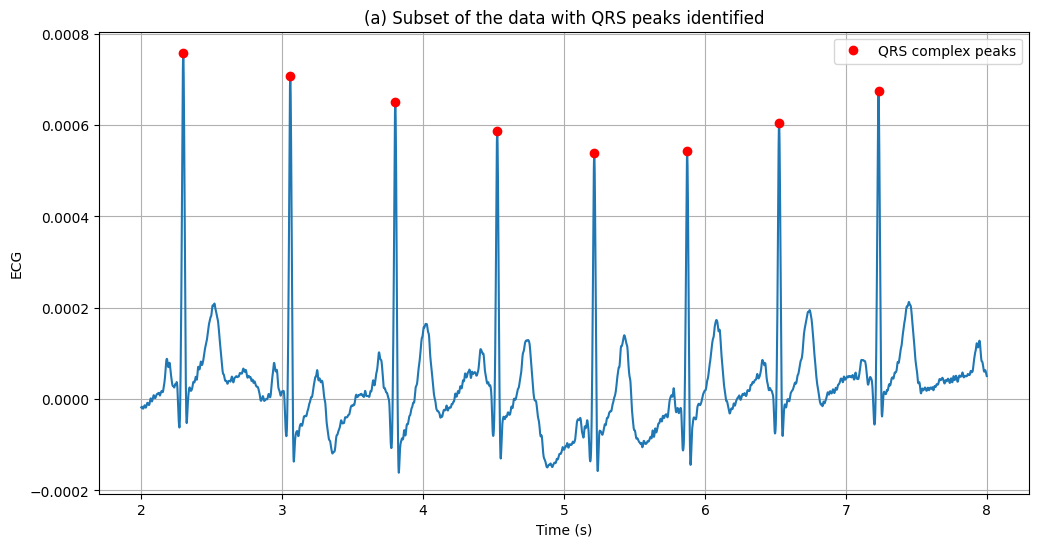

In [30]:
# a)
# Let's take the subset from 2 to 8 seconds i.e. from sample 2000 to 8000
ecg_new = ecg[2000:8000]
t_new = t[2000:8000]

# Plot the ecg data subset
plt.figure(figsize=(12,6))
plt.plot(t_new, ecg_new)
plt.xlabel('Time (s)')
plt.ylabel('ECG')
plt.grid(True)

# Let's then use find_peaks function to find all the QRS complexes
# With distance argument we can separate only the QRS peaks from the signal and with height ignore other peaks than the
# QRS ones
peaks, _ = find_peaks(ecg_new, distance=380, height=0.0004)

# Then we get the average heart rate easily from the times between the peaks
peaks_diff = np.diff(t_new[peaks])
mean_heart_rate = 60 / np.mean(peaks_diff)
print(f'Average heart rate during the subset: {mean_heart_rate:.2f} bpm')

# Finally the QRS peaks are added to the same plot as the signal with red dots
plt.plot(t_new[peaks], ecg_new[peaks], 'ro', label='QRS complex peaks')
plt.legend()
plt.title('(a) Subset of the data with QRS peaks identified')
plt.show()

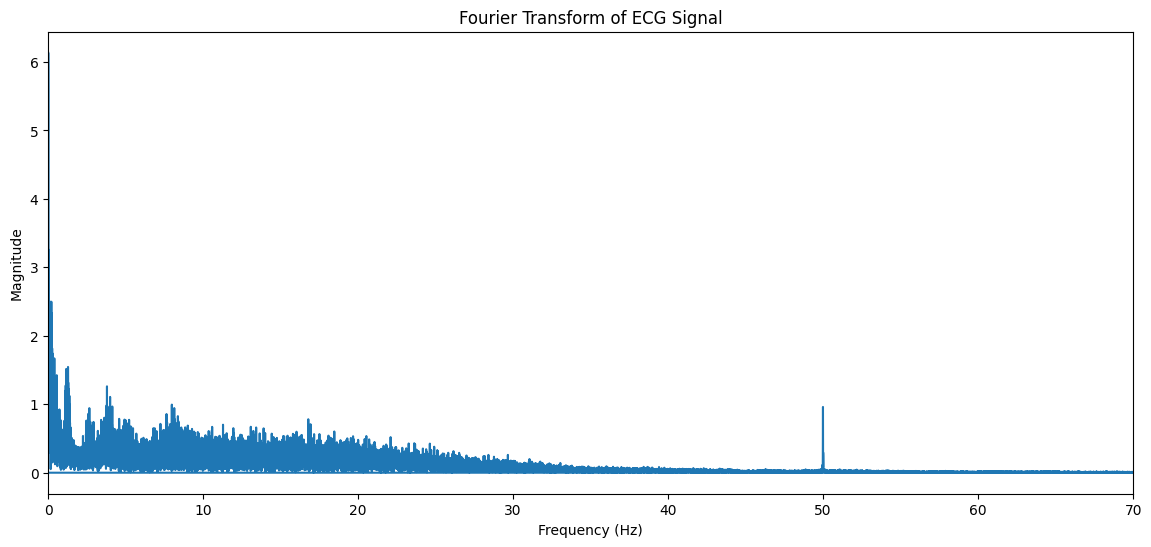

In [6]:
# b)
#Calculate the Fourier transform, it's magnitude and corresponding frequencies
ecg_fft = np.abs(fft(ecg))
freq_axis = np.fft.fftfreq(len(ecg), 1 / samp_freq)
#Plot the magnitude of the Fourier transform
plt.figure(figsize=(14,6))
plt.plot(freq_axis, ecg_fft)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim(0,70) #ECG mainly consists of small frequency signals, so let's set the frequency range from 0 to 70 Hz
plt.title('Fourier Transform of ECG Signal')
plt.show()

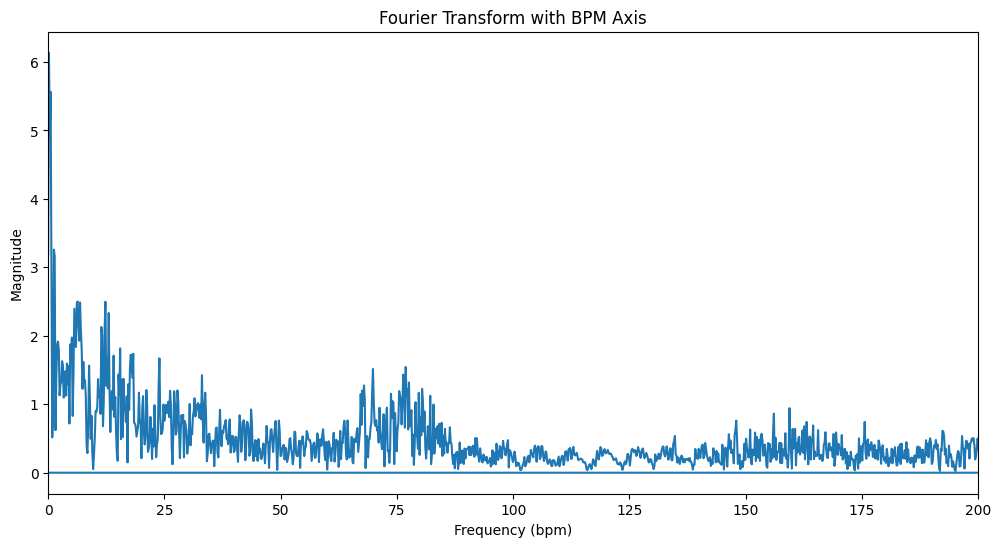

In [ ]:
# c)
#Convert the frequency axis to bpm
freq_bpm = 60 * freq_axis
#Plot the same Fourier transform but now in the bpm
plt.figure(figsize=(12, 6))
plt.plot(freq_bpm, ecg_fft)
plt.xlim(0, 200) #Restrict to the adult human heart rate range
plt.xlabel('Frequency (bpm)')
plt.ylabel('Magnitude')
plt.title('Fourier Transform with BPM Axis')
plt.show()

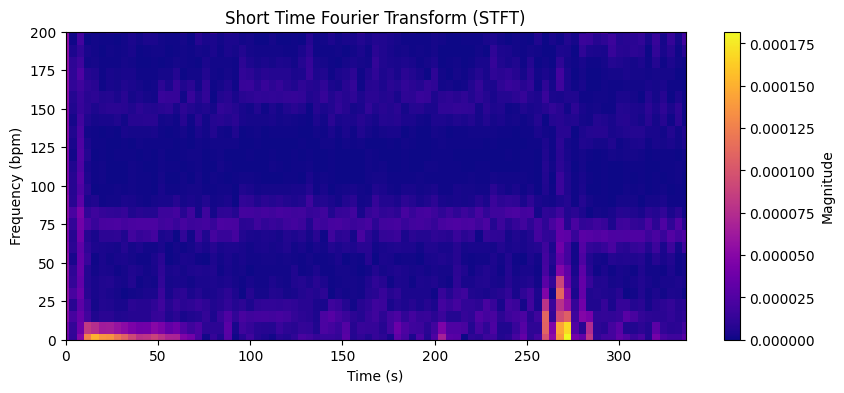

In [75]:
# d)
#Choose parameters for STFT optimized for heart rate visualization
window_size = 8 * samp_freq
overlap = window_size // 2
#Calculate the STFT. Let's choose a window size corresponding to an average heart rate of 80 bpm
frequencies, times, Sxx = stft(ecg, fs=samp_freq, nperseg=window_size, noverlap=overlap)
#Plot the STFT
plt.figure(figsize=(10, 4))
plt.pcolormesh(times, 60 * frequencies, np.abs(Sxx), cmap = 'plasma', shading = 'auto')
plt.colorbar(label='Magnitude')
plt.xlim(0, t[-1])
plt.ylim(0, 200) #Restrict the adult HR to 0 - 200 bpm
plt.xlabel('Time (s)')
plt.ylabel('Frequency (bpm)')
plt.title('Short Time Fourier Transform (STFT)')
plt.show()